In [1]:
"""
A simple example of the Stiefel landing algorithm on PCA problem
"""
from time import time

import matplotlib.pyplot as plt

import numpy as np
from solvers import LandingGeneralizedStiefel
import torch

from scipy.linalg import eigh

In [2]:
n = 1000
p = 20

In [3]:
Q1,_ = np.linalg.qr(np.random.randn(n,n))
Q2,_ = np.linalg.qr(np.random.randn(n,n))
s1 = np.linspace(start=1, stop = 1/n, num = n)
s2 = np.linspace(start=1, stop = 1/n, num = n)
A = (Q1 * s1) @ Q1.T
B = (Q2 * s2) @ Q2.T
#A = A / np.linalg.norm(A)
#B = B / np.linalg.norm(B)

In [4]:
uB, sB, vB = np.linalg.svd(B)
B_sqrt_inv = np.dot(uB * sB**(-0.5), uB.T)
M = B_sqrt_inv @ A @ B_sqrt_inv
uG, sG, vhG = np.linalg.svd(M)
x_true = B_sqrt_inv  @ uG[:,:p]

In [5]:
np.trace(x_true.T @ A @ x_true)

1797.4374727248216

In [6]:
batch_size = 128

A_torch = torch.from_numpy(A).float()
B_torch = torch.from_numpy(B).float()

lambda_regul = 1
learning_rate = 0.001

param = torch.nn.Parameter(torch.randn(n,p))
optimizer = LandingGeneralizedStiefel((param,), 
        lr=learning_rate, lambda_regul=lambda_regul)

In [7]:
n_epochs = 1000

for epoch in range(n_epochs):
    permutation = torch.randperm(n)

    for i in range(0, n, batch_size):          
        optimizer.zero_grad()

        idx_batch = permutation[i:i+batch_size]
        a = A_torch[idx_batch]
        b = B_torch#[idx_batch]
        loss = -.5 * (torch.matmul(a, param) ** 2).sum() / (batch_size)
        loss.backward()
        print(loss.item())
        distance = torch.linalg.norm(param.T @ B_torch @ param - torch.eye(p,p))
        print(distance.item())
        optimizer.step(((b,),))

-3.1804535388946533
2254.531494140625
-1.923152208328247
1003.5750122070312
-1.6870462894439697
762.2437133789062
-1.4316030740737915
627.5721435546875
-1.3098087310791016
539.0166015625
-1.1300060749053955
475.46197509765625
-1.1438215970993042
427.2332458496094
-0.9036781787872314
389.1761779785156
-1.0829200744628906
358.2601013183594
-0.9916463494300842
332.5724182128906
-0.9397227168083191
310.8408508300781
-0.8971783518791199
292.18212890625
-0.8566660284996033
275.96319580078125
-0.8382981419563293
261.7166748046875
-0.8165979385375977
249.089599609375
-0.6407362222671509
237.80995178222656
-0.7893126606941223
227.6648406982422
-0.740154504776001
218.48426818847656
-0.7632919549942017
210.13174438476562
-0.7450698614120483
202.49557495117188
-0.7433661222457886
195.48365783691406
-0.723698616027832
189.01934814453125
-0.6879313588142395
183.03843688964844
-0.566216766834259
177.48623657226562
-0.683221161365509
172.31634521484375
-0.6978528499603271
167.4890899658203
-0.62727880

In [8]:
distance.item()

1.3502217531204224

In [9]:
torch.trace(param.T@A_torch@param).item()

349.6460266113281

In [11]:
np.trace(x_true.T @ A @ x_true)

1797.4374727248216

In [10]:
param.T @ B_torch @ param - torch.eye(p,p)

tensor([[ 2.5906e-01, -1.1517e-02, -3.2193e-02,  1.0760e-02, -9.6744e-03,
         -1.0743e-02, -4.9648e-02,  3.7901e-02,  1.1048e-02,  1.9046e-02,
         -1.7780e-02, -5.4823e-03,  1.4619e-02,  8.4015e-03,  8.9177e-03,
         -5.3866e-03,  3.0244e-04, -5.3932e-03,  2.6250e-02, -2.4102e-02],
        [-1.1517e-02,  2.8567e-01, -5.1651e-03,  1.9065e-02,  2.8432e-02,
         -4.1235e-02, -7.9657e-03,  8.9296e-04,  2.0487e-02, -2.2122e-02,
          1.6022e-02,  1.8937e-02,  3.8519e-03,  1.1792e-02, -2.5457e-02,
          3.5464e-02,  1.4763e-03,  9.3410e-03, -2.3141e-02,  4.2165e-02],
        [-3.2193e-02, -5.1650e-03,  3.2330e-01, -5.4776e-02,  2.8189e-03,
         -3.1454e-03,  5.4711e-02, -9.8874e-03, -6.5206e-02, -1.4025e-03,
          3.1376e-03,  6.1674e-03, -4.1015e-03,  2.4307e-02,  8.4326e-04,
         -7.7361e-03,  5.0379e-02, -1.8869e-03,  4.4228e-02,  6.4441e-02],
        [ 1.0760e-02,  1.9065e-02, -5.4776e-02,  3.0644e-01,  1.4475e-02,
          4.3249e-03, -3.3867e-03, 

In [21]:
torch.matmul(a, param).shape

torch.Size([128, 20])

In [14]:
param.shape

torch.Size([1000, 20])

In [18]:
a.shape

torch.Size([128, 1000])

In [27]:
torch.matmul(a, param)

RuntimeError: expected scalar type Double but found Float

In [7]:
np.linalg.norm(x_true.T @ B @ x_true - np.eye(p), 'fro')

6.971830085134284e-14

In [8]:
eigvals, eigvecs = eigh(A, B, eigvals_only=False, subset_by_index=[n-2*p, n-1])

In [9]:
eigvecs.shape

(1000, 40)

In [10]:
np.linalg.norm(eigvecs[:,:p].T @ B @ eigvecs[:,:p] - np.eye(p), 'fro')

7.973191751172965e-15

In [11]:
np.trace(x_true.T @ A @ x_true)

1824.883507748079

In [12]:
np.trace(eigvecs.T @ A @ eigvecs)

2176.9154939618047

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


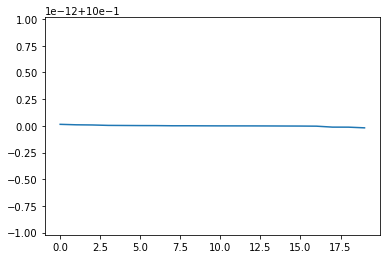

In [13]:
_, s_dist, _ = np.linalg.svd(x_true.T @B@ eigvecs[:,-p:])
print(s_dist)
plt.plot(s_dist)

In [14]:
solver = GeneralizedLanding(maxiter = 4000)
x0 = Q2[:,:p]
x, optlog = solver.solve(A, B, p, 1, 1, 0.5, x0=x0)

-14.24830614312546
0.049699094559156165
-19.58649011663549
0.21885985889897713
-28.352873063813547
0.05479432719480674
-39.99937130127687
0.21981809328527555
-55.4250481808607
0.16490530908887502
-73.16154378610915
0.20915425402927837
-91.53651298085805
0.2044508664965975
-109.51561115867064
0.18681163670127748
-126.93759253663234
0.16202410157518346
-143.96172035211478
0.13852918414115828
-160.7380156087768
0.11923581100305121
-177.3478458911486
0.10406479175553678
-193.82311511296678
0.0921486112940754
-210.17041217369166
0.08263892196591058
-226.38657136743197
0.07489476949676403
-242.46742313202046
0.06846495493112983
-258.4120576171193
0.0630351135707795
-274.224027974584
0.058384331693751755
-289.91078970845865
0.054354571817162634
-305.48249883942333
0.05082977074034618
-320.9508503561941
0.04772204048826153
-336.32819182204037
0.044962930055537594
-351.62688165641816
0.04249802027826877
-366.8587817521315
0.04028352397734964
-382.0348024962089
0.0382840006808061
-397.1644790197

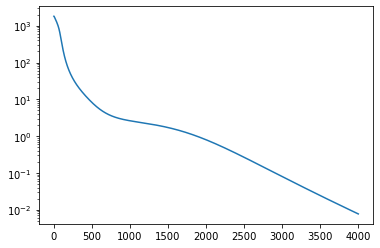

In [17]:
plt.semilogy(np.trace(x_true.T @ A @ x_true) + np.array(optlog['iterations']['fx']))
plt.show()
plt.semilogy(optlog['iterations']['gradnorm'])
plt.show()
plt.semilogy(optlog['iterations']['distance'])
plt.show()

In [24]:
Bx = B@x
xtBx = x.T@Bx
grad = -A@x
rel_grad = grad@(Bx.T@ Bx) - Bx@(grad.T @ Bx)
normal_direction = Bx@(xtBx - np.eye(p))
landing_direction = rel_grad + 1 * normal_direction



In [21]:
np.linalg.norm(rel_grad,'fro')

0.08351437692937383

In [22]:
np.linalg.norm(normal_direction,'fro')

0.02549170993071184

In [20]:
np.trace(normal_direction.T@rel_grad)

-1.8177327048077285e-18

In [17]:
np.linalg.norm(rel_grad,'fro')

0.0009411469974263811

In [18]:
np.linalg.norm(Bx.T@x - np.eye(p),'fro')

3.8736286092430003e-07

[1.00000009 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 0.99987038 0.95772783]


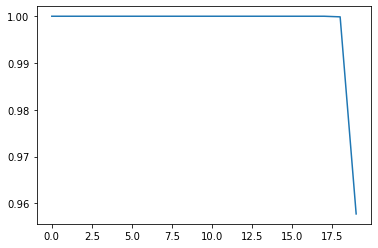

In [21]:
_, s_dist, _ = np.linalg.svd(x_true.T @B@ cp.asnumpy(x))
print(s_dist)
plt.plot(s_dist)

In [45]:
Bx = B@x
grad = -A@x
rel_grad = grad@(Bx.T@ Bx) - Bx@(grad.T @ Bx)

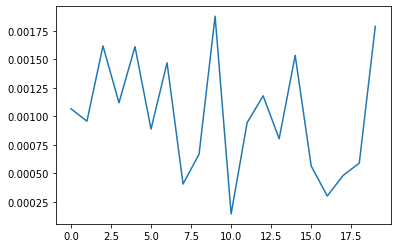

In [46]:
plt.plot(np.linalg.norm(rel_grad, axis = 0))

In [53]:
eigvals[p+1] - eigvals[p]

0.8714446208953959

In [32]:
B@x @ (x.T@B@x-np.eye(p))

array([[ 2.11388117e-08,  5.62158691e-08, -7.78938919e-08, ...,
         2.20061096e-07,  3.50985848e-07, -2.42929821e-07],
       [-4.84000133e-08, -1.74709516e-07,  6.76702261e-08, ...,
        -6.32241647e-07, -9.75046602e-08,  1.53047507e-07],
       [ 6.48428321e-07,  4.94509806e-07, -1.74013067e-07, ...,
         3.61238410e-07, -2.89517324e-07, -1.80160832e-07],
       ...,
       [-4.54503122e-07, -5.72365020e-07,  3.08299481e-08, ...,
        -1.33094021e-06, -1.67012858e-08,  1.84383763e-07],
       [ 3.18292594e-08, -3.27352732e-07, -1.06944043e-07, ...,
        -8.49196693e-07, -1.60643097e-07,  2.12091856e-08],
       [-6.56793925e-08, -1.65691900e-07,  1.05180959e-07, ...,
         1.59344099e-07,  2.64845165e-07,  9.70515044e-08]])

In [29]:
eigvals

array([ 25.48050366,  26.35194828,  28.12034402,  30.01376447,
        31.3255748 ,  35.00176122,  36.70672503,  38.16666289,
        41.69941254,  45.30054971,  52.08286952,  55.33960199,
        62.75198968,  72.59880648,  84.16764082,  99.35436891,
       132.27936876, 172.61028228, 257.71751558, 476.30734557])

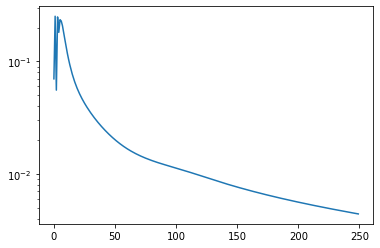

In [24]:
plt.semilogy(optlog['iterations']['distance'])

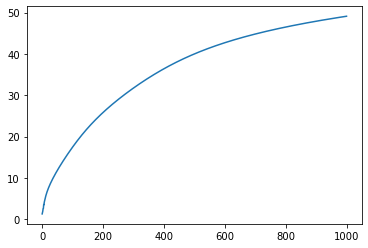

In [20]:
plt.plot(optlog['iterations']['gradnorm'])

In [14]:
np.trace(x_true).item()

-2.3844033687938464

In [15]:
x.T @ B @ x

array([[ 1.00086590e+00,  1.31238331e-05,  6.94913287e-05, ...,
        -1.19343693e-04, -1.89682327e-04, -1.58990216e-04],
       [ 1.31238331e-05,  1.00084025e+00, -1.25364565e-04, ...,
        -1.57699673e-04,  5.91658826e-05,  3.11380342e-04],
       [ 6.94913287e-05, -1.25364565e-04,  1.00092079e+00, ...,
        -4.15300636e-05, -7.17551079e-05, -9.08014822e-05],
       ...,
       [-1.19343693e-04, -1.57699673e-04, -4.15300636e-05, ...,
         1.00052736e+00, -9.45591990e-05, -2.39738364e-04],
       [-1.89682327e-04,  5.91658826e-05, -7.17551079e-05, ...,
        -9.45591990e-05,  1.00064888e+00,  3.76977382e-04],
       [-1.58990216e-04,  3.11380342e-04, -9.08014822e-05, ...,
        -2.39738364e-04,  3.76977382e-04,  1.00113526e+00]])

In [16]:
x_true.T @ x

array([[-4.67627127e+01,  7.98312761e+01,  5.17810424e+01, ...,
        -7.11014658e+01,  1.00080334e+02,  1.86731181e+02],
       [ 1.25023393e+01, -3.85245917e+00, -1.42425113e+01, ...,
        -2.42075804e+01, -3.23314197e+01,  1.12324834e+01],
       [ 8.65730924e+00,  1.62621211e+01, -7.16700813e+00, ...,
         7.36657045e+00, -1.55324505e+01, -7.41311953e+00],
       ...,
       [-2.09253119e-01, -3.74590720e-01,  1.97479104e-01, ...,
         2.46551374e-01,  2.09442650e-01, -1.10079185e-01],
       [-1.07404992e-01, -3.19254317e-01,  1.94228002e-01, ...,
         1.68749859e-01,  2.81009890e-02, -1.79964983e-01],
       [-2.25968196e-01, -3.23456764e-01, -3.57745488e-01, ...,
        -1.43035405e-01, -7.58094489e-01, -1.35040239e-01]])

In [17]:
_, s_dist, _ = np.linalg.svd(x_true.T @B@ cp.asnumpy(x))
s_dist

In [18]:
s_dist

array([1.00925337, 1.00640773, 1.00588115, 1.00501625, 1.00462065,
       1.00423089, 1.00364651, 1.00352689, 1.00313673, 1.00291757,
       1.00230094, 1.00220182, 1.00206627, 1.00191786, 1.00171362,
       1.00165521, 1.00148391, 1.00131216, 1.00119279, 1.00107472,
       1.00104211, 1.00087645, 1.00080842, 1.00078395, 1.00070319,
       1.00053786, 1.00052707, 1.00048158, 1.0004151 , 1.0004021 ,
       1.00034277, 1.00030287, 1.00027852, 1.00024372, 1.00023352,
       1.00021416, 1.00021061, 1.00017287, 1.00015888, 1.00014739,
       1.00012927, 1.0001234 , 1.00010358, 1.00009986, 1.00008928,
       1.00007595, 1.00007269, 1.00006771, 1.00006328, 1.000055  ,
       1.00005125, 1.00004644, 1.00004441, 1.00003514, 1.00003279,
       1.0000307 , 1.00002722, 1.00002239, 1.00002154, 1.00002088,
       1.00001781, 1.00001415, 1.00001376, 1.00001223, 1.00001032,
       1.00000838, 1.00000796, 1.00000722, 1.0000056 , 1.00000538,
       1.00000502, 1.00000459, 1.00000382, 1.00000324, 1.00000

In [53]:
np.trace(cp.asnumpy(x).T @ A @ cp.asnumpy(x))

8488.207642404303

In [54]:
np.trace(x_true.T @ A @ x_true)

29567.349263606764